# **Data Loading and Pre-processing**

---

In [ ]:
# set up code for this project
import numpy as np
import matplotlib.pyplot as plt
import math as math
import pandas as pd
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import os
import seaborn as sea
import plotly.graph_objects as go


from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as train_test_split
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)
import plotly.express as px

np.random.seed(1)

%matplotlib inline

In [ ]:
# Check Zacc's Discord message at: https://discord.com/channels/@me/1143389784790810684/1178063081125982278 on how to make this work inside your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/412_Project/voice.csv'

In [ ]:
# Reading voice.csv data into a dataframe 'data'
data = pd.read_csv(file_path)
# Displaying first n values from data
data.head(n = 5)

,meanfreq,sd,median,q25,q75,iqr,skew,kurt,sp_ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# **K-Nearest Neighbor**

---

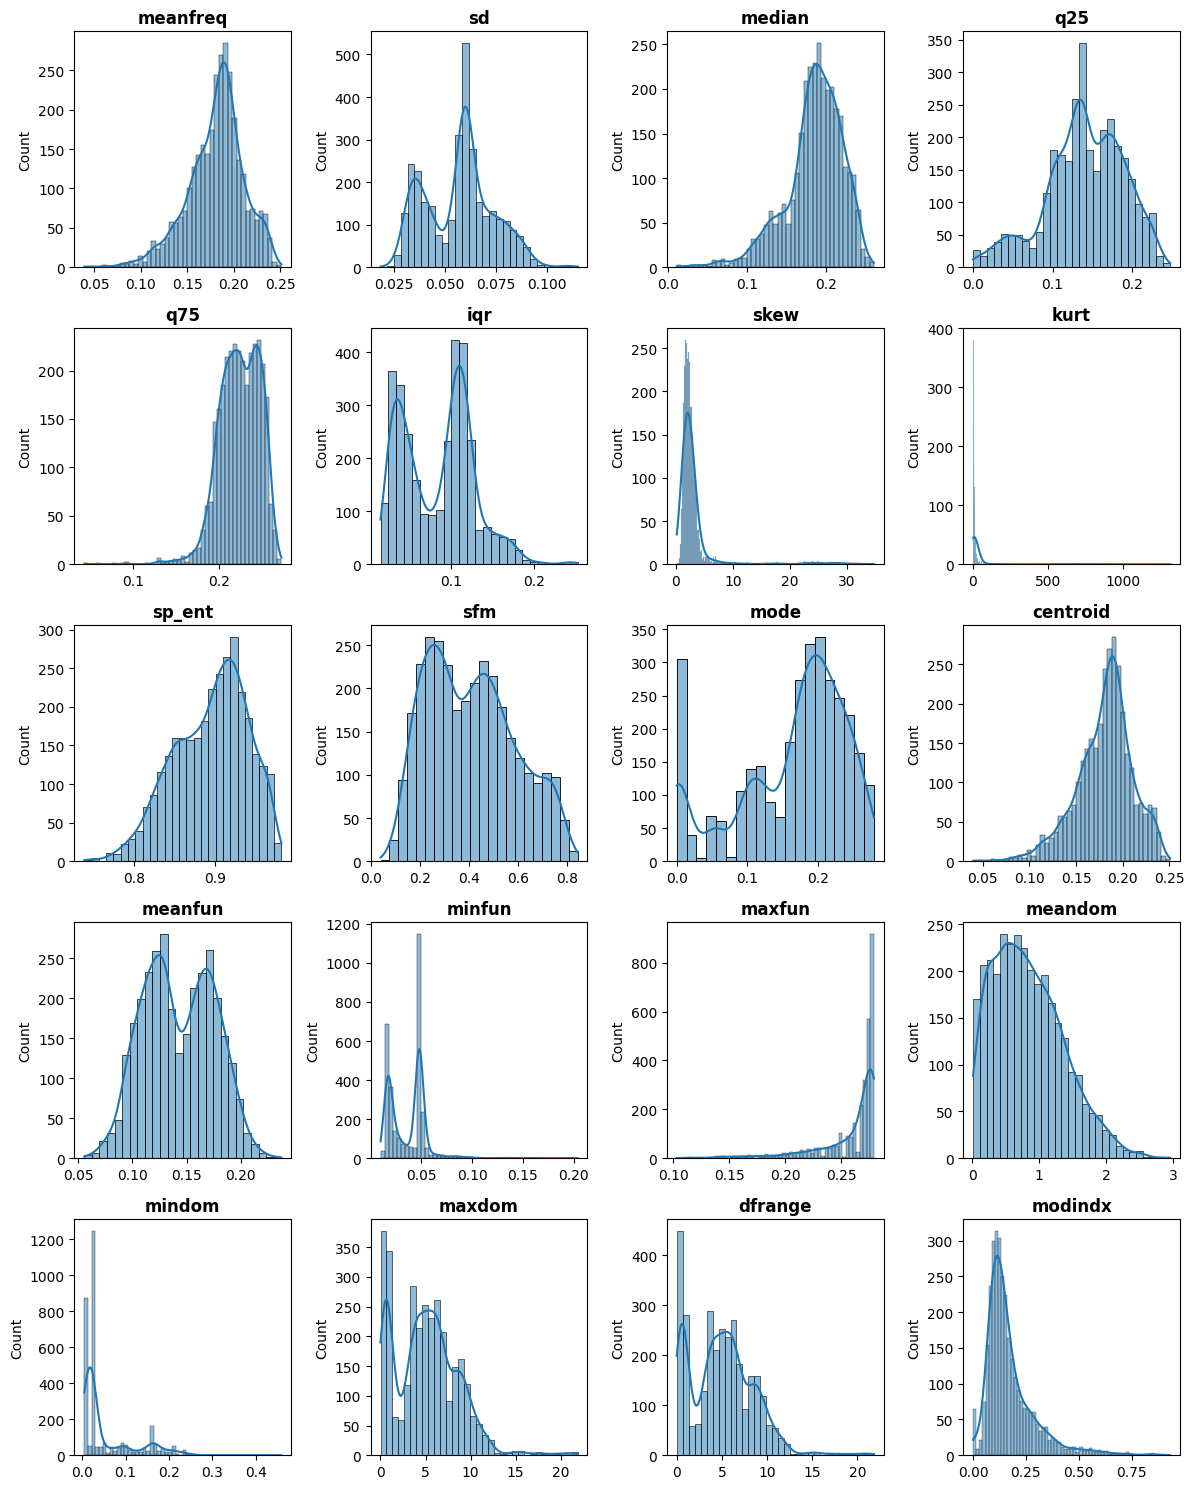

In [ ]:
columnList = data.iloc[:,:-1].columns.to_list()
fig, axs = plt.subplots(nrows = 5, ncols = 4, figsize=(12, 15))
axs = axs.flat
# (nrows = 5, ncols = 4, figsize = (12, 15))

for i, column in enumerate(columnList):
  sea.histplot(data, x = column, kde = True, ax = axs[i])
  axs[i].set_title(column, fontweight = 'bold')
  axs[i].set_xlabel('')


fig.tight_layout()
fig.show()

In [ ]:
y = data['label'].to_frame()
print(y.size)
print(type(y))
X = data.drop('label', axis = 1)


# We divide into training and test set.
# We define the random seed for reproducibility.
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                       test_size = 0.3,
                                       random_state = SEED,
                                       stratify = y)

# Sanity check for propr test and train data split
print("This is the X train")
print(X_train.head(n = 5))
print("This is the X test")
print(X_test.head(n=5))
print("This is the Y train")
y_train = y_train
y_train['label'] = y_train['label'].replace({'male': 0, 'female': 1})
print(y_train.head(n=5))
print("This is the Y test")
y_test = y_test
y_test['label'] = y_test['label'].replace({'male': 0, 'female': 1})
print(y_test.head(n=5))


X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

y_train = np.array(y_train)
y_test = np.array(y_test)

# print(X_test.shape)
# print(X_train.shape)
# print(X.shape)
# print(y_test.shape)
# print(y_train.shape)
# print(y.shape)


3168
<class 'pandas.core.frame.DataFrame'>
This is the X train
      meanfreq        sd    median       q25       q75       iqr      skew  \
296   0.079369  0.088650  0.040976  0.002119  0.143650  0.141531  9.013217   
220   0.163194  0.067451  0.188192  0.102962  0.212503  0.109540  2.278882   
2191  0.185102  0.047233  0.175616  0.157696  0.219968  0.062272  2.328919   
177   0.141047  0.065363  0.109746  0.091653  0.201398  0.109746  2.902501   
2602  0.236635  0.033557  0.243339  0.214010  0.263502  0.049493  1.693354   

           kurt    sp_ent       sfm      mode  centroid   meanfun    minfun  \
296   92.766695  0.834213  0.450205  0.001413  0.079369  0.095733  0.016194   
220    9.287996  0.927515  0.554522  0.211931  0.163194  0.103156  0.032193   
2191   9.042176  0.883298  0.362863  0.158144  0.185102  0.153339  0.048731   
177   13.211780  0.927861  0.567241  0.101144  0.141047  0.078778  0.017335   
2602   4.969441  0.831598  0.130053  0.253421  0.236635  0.176765  0.0469

In [ ]:
def euclidean_dist(X_test, X_train):
  dists = np.add(np.sum(X_test ** 2, axis=1, keepdims=True), np.sum(X_train ** 2, axis=1, keepdims=True).T) - 2* X_test @ X_train.T
  return dists

# Unit test code here (you can uncomment the four lines below to test)
# X_train = np.array([[1, 2], [0, 3], [-1, 1]])
# X_test = np.array([[-1, 0], [2, 1]])
dists = euclidean_dist(X_test, X_train)
print(dists.shape)


(951, 2217)


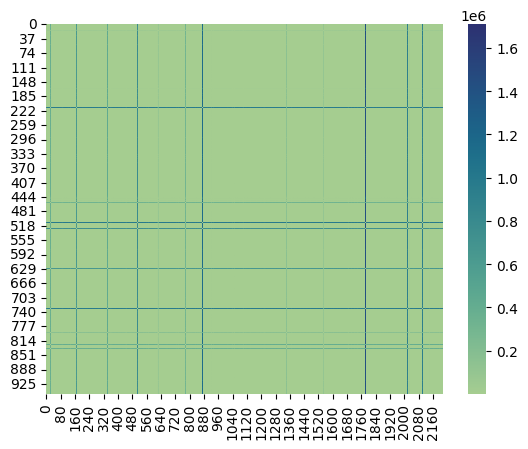

In [ ]:
# Create a heatmap
sea.heatmap(dists, cmap='crest')

# Display the plot
plt.show()

In [ ]:
def find_k_neighbors(dists, y_train, k):
  """
  find the labels of the top k nearest neighbors

  Inputs:
  - dists: distance matrix of shape (num_test, num_train)
  - Y_train: A numpy array of shape (num_train) containing ground truth labels for training data
  - k: An integer, k nearest neighbors

  Output:
  - neighbors: A numpy array of shape (num_test, k), where each row containts the
               labels of the k nearest neighbors for each test example
  """
  # TODO:
  # find the top k nearest neighbors for each test sample.
  # retrieve the corresponding labels of those neighbors.
  # Here is the pseudo-code:
  # for i = 0 ... num_test-1
  #     idx = numpy.argsort(i-th row of dists)
  #     neighbors[i] = Y_train(idx[0]), ..., Y_train(idx[k-1])
  # return neighbors


  # Advanced: You can accelerate the code by, e.g., argsort on the `dists` matrix directly

  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  neighbors = np.zeros((dists.shape[0], k))
  # print("New print out lines")
  # print(dists.shape[0])

  for i in range(0, dists.shape[0]):
      idx = dists[i].argsort()[:k]
      # print(y_train[idx].shape)
      k_labels = y_train[idx]
      # print(k_labels[0])
      # print(k_labels[1])
      # print(k_labels[2])
      # print(k_labels.shape)
      # print(neighbors[0])
      # print(neighbors.shape)
      neighbors[i] = k_labels.flatten()

  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  return neighbors


# Unit test code here (you can uncomment the lines below to test)
# Compute by hand to check if the result is correct.
"""
[[1. 0. 1.]
 [0. 1. 1.]]
"""
k = 3  # you can vary it as 1 or 3
# Y_train = y_train
# print(dists.shape[0])
# print(type(dists))
# print(y_train.size)
# print(type(y_train))
neighbors = find_k_neighbors(dists, y_train, k)
print(neighbors.shape)

(951, 3)


In [ ]:
def knn_predict(X_test, X_train, y_train, k):
  """
  predict labels for test data.

  Inputs:
  - X_test: A numpy array of shape (num_test, dim_feat) containing test data.
  - X_train: A numpy array of shape (num_train, dim_feat) containing training data.
  - Y_train: A numpy array of shape (num_train) containing ground truth labels for training data
  - k: An integer, k nearest neighbors

  Output:
  - Y_pred: A numpy array of shape (num_test). Predicted labels for the test data.
  """
  # TODO:
  # find the labels of k nearest neighbors for each test example,
  # and then find the majority label out of the k labels
  #
  # Here is the pseudo-code:
  # dists = euclidean_dist(X_test, X_train)
  # neighbors = find_k_neighbors(dists, Y_train, k)
  # Y_pred = np.zeros(num_test, dtype=int)  # force dtype=int in case the dataset
  #                                         # stores labels as float-point numbers
  # for i = 0 ... num_test-1
  #     Y_pred[i] = # the most common/frequent label in neighbors[i], you can
  #                 # implement it by using np.unique
  # return Y_pred
  # -----------------------------------
  dists = euclidean_dist(X_test, X_train)
  neighbors = find_k_neighbors(dists, y_train, k)
  Y_pred = np.zeros(len(X_test), dtype=int)

  for i in range(len(X_test)):
    values, counts = np.unique(neighbors[i], return_counts=True)
    Y_pred[i] = values[counts == counts.max()].min()
  return Y_pred

  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Unit test code here (you can uncomment the lines below to test)
# Compute by hand to check if the result is correct.
"""
[1 1]
"""
Y_pred = knn_predict(X_test, X_train, y_train, k)
print(Y_pred.shape)

(951,)


In [ ]:
def compute_error_rate(Y_pred, y_test):
  """
  Compute error rate given the predicted results and true lable.
  Inputs:
  - ypred: array of prediction results.
  - ytrue: array of true labels.
    ypred and ytrue should be of same length.
  Output:
  - error rate: float number indicating the error in percentage
                (i.e., a number between 0 and 100).
  """
  # Here is the pseudo-code:
  # err = 0
  # for i in range (num_test):
  #     err = err + (ypred[i] != ytrue[i])  # generalizes to multiple classes
  # error_rate = err / num_test * 100
  # return error_rate
  #
  # Advanced (optional):
  #   implement it in one line by using vector operation and the `mean` function

  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  err = 0
  print("Function: compute_error_rate")
  # print(Y_pred.shape)
  # # print(Y_pred)
  # print(y_test.shape)
  y_test = y_test.flatten()
  # print(y)

  for i in range(len(Y_pred)):
    err = err + (Y_pred[i] != y_test[i])

  error_rate = err / len(Y_pred)
  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  return error_rate

error_rates = compute_error_rate(Y_pred, y_test)
print(error_rates)
print("The error rate is: {:.2%}".format(error_rates))

Function: compute_error_rate
0.29863301787592006
The error rate is: 29.86%


In [ ]:
# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0],
        y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers',
        marker_symbol=marker
    ) for X, y, label, split, marker in trace_specs
])

fig.update_traces(
    marker_size=12,
    marker_line_width=1.5,
    marker_color="lightyellow"
)

fig.show()


In [ ]:
# Load and split data
# X, y = make_moons(noise=0.3, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y.astype(str), test_size=0.25, random_state=0)

# Fit the model on training data, predict on test data
clf = KNeighborsClassifier(5)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

fig = px.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'male': 'diamond-open-dot', 'female': 'triangle-up-open-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

mesh_size = .02
margin = 0.25

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = KNeighborsClassifier(3, weights='uniform')
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


# Plot the figure
fig = go.Figure(data=[
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        colorscale='RdBu'
    )
])
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

mesh_size = .02
margin = 0.25

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = KNeighborsClassifier(3, weights='uniform')
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)

fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=False,
        colorscale='RdBu',
        opacity=0.4,
        name='Score',
        hoverinfo='skip'
    )
)
fig.show()

# Logistic Regression Training

---

In [ ]:
# assuming we used the same data prepocessing methods
# only using centroid, fundamental frequency. dont use duration, std, or frequency.
X = data.drop(['meanfreq', 'sd', 'median', 'q25', 'q75', 'skew', 'kurt', 'sfm', 'mode', 'minfun', 'maxfun', 'mindom', 'maxdom', 'dfrange', 'label'], axis = 1)
X.info()

print(X.shape)
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                       test_size = 0.2,
                                       random_state = SEED,
                                       stratify = y)


def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def MLR(X, W):
    logits = np.dot(X, W)
    probabilities = softmax(logits)
    return probabilities

def cross_entropy_loss(X, W, y):
    num_samples = X.shape[0]

    logits = np.dot(X, W)
    probabilities = softmax(logits)

    # One-hot encode the labels
    y_one_hot = np.eye(probabilities.shape[1])[y]

    # Calculate cross-entropy loss
    loss = -np.sum(y_one_hot * np.log(probabilities + 1e-8)) / num_samples

    # Calculate the gradient of the loss with respect to W
    grad = np.dot(X.T, probabilities - y_one_hot) / num_samples

    return loss, grad

# Assuming your original labels are in a DataFrame named Y_train
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


y_train = y_train_encoded
y_test = label_encoder.transform(y_test)

num_iters = 2000
lr = 0.5

# Initialize weights
w = np.random.rand(X_train.shape[1], len(np.unique(y_train)))
loss_history = []

for i in range(num_iters):
    # Update weights using gradient descent
    logits = MLR(X_train, w)
    loss, grad = cross_entropy_loss(X_train, w, y_train)
    w -= lr * grad

    # Compute and store the loss for plotting
    loss_history.append(loss)

# Predict the label for all test examples
test_logits = MLR(X_test, w)
test_predictions = np.argmax(test_logits, axis=1)

# Report the test accuracy
acc = np.mean(test_predictions == y_test)
print(f'Test Accuracy: {acc * 100:.2f}%')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iqr       3168 non-null   float64
 1   sp_ent    3168 non-null   float64
 2   centroid  3168 non-null   float64
 3   meanfun   3168 non-null   float64
 4   meandom   3168 non-null   float64
 5   modindx   3168 non-null   float64
dtypes: float64(6)
memory usage: 148.6 KB
(3168, 6)
(100,)


ValueError: ignored

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted male', 'Predicted female'],
            yticklabels=['Actual male', 'Actual female'])
plt.title('Confusion Matrix')
plt.show()


# Naive Bayes

---

In [ ]:
y = data['label'].to_frame()
X = data.drop(['label'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                       test_size = 0.3,
                                       random_state = SEED,
                                       stratify = y)

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Assuming X is a Pandas DataFrame
feature_names = X.columns.tolist()

print(feature_names)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align="center")
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
X = data.drop(['meanfreq', 'sd', 'median', 'q25', 'q75', 'skew', 'kurt', 'sp_ent', 'sfm', 'mode', 'centroid', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'], axis = 1)
X.info()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                       test_size = 0.3,
                                       random_state = SEED,
                                       stratify = y)

In [ ]:
model = GaussianNB()

model.fit(X_train, y_train);

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

In [ ]:
labels = ["Male", "Female"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();